### Problem Statement

## Problem Statement
- The aim of the project is to sort and categorize the players using their
  overall talent and international reputation, also to cluster them based
  on using their whole skillset. 

- Task 1:-Prepare a complete data analysis report on the given data.
- Task 2:- Explore football skills and cluster football players based on their attributes.
- Task3:- Explore the data and attempt all the below asked questions in a
  step by step manner:
  Prepare a rank ordered list of top 10 countries with most players. Which
  countries are producing the most footballers that play at this level?
  Plot the distribution of overall rating vs. age of players. Interpret what is the
  age after which a player stops improving?
  Which type of offensive players tends to get paid the most: the striker, the
  right-winger, or the left-winger?


### Importing Necessary Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import davies_bouldin_score,silhouette_score

### Importing the datasets and Basic checks

In [5]:
data=pd.read_csv("players_20.csv")
pd.set_option('display.max_columns',None)
data

sofifa_id                                         player_url   
0         158023  https://sofifa.com/player/158023/lionel-messi/...  \
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age   
0               L. Messi       Lionel Andrés Messi Cuccittini   32  \
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality   
0      1987-06-24        170         72   Argentina  \
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur   
0                       FC Barcelona       94         94   95500000    565000  \
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot   
0           RW, CF, ST           Left                         5          4  \
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

In [6]:
data.head()

sofifa_id                                         player_url   
0     158023  https://sofifa.com/player/158023/lionel-messi/...  \
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob   
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24  \
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential   
0        170         72   Argentina         FC Barcelona       94         94  \
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot   
0   95500000    565000       RW, CF, ST           Left  \
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate   
0                         5          4            4     Medium/Low  \
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur   
0       Messi       Yes         195800000.0  \
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position   
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW  \
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until   
0                10.0         NaN  2004-07-01                2021.0  \
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling   
0             NaN                   NaN  87.0      92.0     92.0       96.0  \
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes   
0       39.0    66.0        NaN          NaN         NaN          NaN  \
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [7]:
data.tail()

sofifa_id                                         player_url   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...  \
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg   
18273    Shao Shuai            邵帅   22  1997-03-10        186         79  \
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential   
18273    China PR               Beijing Renhe FC       48         56  \
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot   
18273      40000      2000               CB          Right  \
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate   
18273                         1          3            2    Medium/High  \
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position   
18273    Normal        No             70000.0         NaN           RES  \
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until   
18273                36.0              NaN  2018-07-13                2019.0  \
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing   
18273             NaN                   NaN  57.0      23.0     28.0  \
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking   
18273       33.0       47.0    51.0        NaN          NaN         NaN  \
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [8]:
data.shape

(18278, 104)

In [9]:
data.size

1900912

In [10]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [11]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  player_tags       1499 non-null   object
 12  team_position     18038 non-null  object
 13  loaned_from       1048 non-null   object
 14  joined            16990 non-null  object
 15  nation_position   1126 non-null   object
 16  player_traits     7566 non-null   object
 17  ls          

In [12]:
data.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_jersey_number          18038 non-null  float64
 13  contract_valid_until        180

### Insights-

-There are 43 categorical columns and 61 numerical columns.

-There are total 18278 entries and 104 columns.

-16 columns having missing values.


In [13]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall   
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000  \
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation   
count  18278.000000  1.827800e+04   18278.000000              18278.000000  \
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number   
count  18278.000000  18278.000000        1.698000e+04        18038.000000  \
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting   
count          18038.000000           1126.000000  16242.000000  16242.000000  \
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving   
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000  \
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning   
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000  \
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

### Insights
1. The average age of the players is 25, and most players are aged between 16      and 30 . this distribution follows a normal pattern.
2. The youngest player is 16 years old, while the oldest player is 42 years.
3. Mean and median fot the both height and weight columns are approximately        equal and its follows a normal distribution pattern.
4. The average player value is around €2.48 million, with significant              variation,while the minimum player value is € 0.0.
5. The minimum value and wage paid to players are found to be 0 euros.
6. The average player value is around €2.48 million, with significant              variation,while the minimum player value is € 0.0
7. Most players (75%) have an international reputation rating of 1 on a scale      of 1 to 5. This indicates that the majority of players are not widely          recognized on an international level.
8. sofifa_id, team_jersey_number, and nation_jersey_number are generally          irrelevant. These columns do not provide information about the players'        abilities or attributes and are mainly identifiers or categorical              information.
9. Most players utilize their weak foot potential at an average level, with a      weak foot rating averaging around 2.9 on a
   scale of 1 to 5.
10. The average pace rating of players is around 67, with the median being 69,     indicating a close to normal distribution.
11. 75% of players have shooting skills rated between 14 and 63. Only the top       25% have ratings between 63 and 93,
    indicating a wide variation in shooting abilities.
12. The majority of players (75%) have goalkeeping skills (reflexes,               positioning, kicking, handling, and diving) rated between
    1 and 14 on a scale of 1 to 100, reflecting that goalkeeping is a               specialized skill possessed by a minority.
13. Pace ranges from 24 to 96, with 25% of players are much faster than others     having rating above 75.
14. Shooting,dribbling,passing, these skills, on average, follows a normal         distribution.
15. gk_diving,gk_handling,gk_kicking, gk_reflexes,gk_speed,gk_positioning           columns have only 2036 entries.
16. Unless a player plays at a Goalkeeper position (GW), all his goalkeeper         statistics are NaNs.
17. On average, players' movement skills are rated as follows: sprint speed at     64, agility at 63, and reactions at 61. The
    highest rating observed for a player with exceptional movement skills is 96

In [14]:
data.describe(include='O')

player_url    short_name   
count                                               18278         18278  \
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions   
count        18278       18278       18278         18278            18278  \
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags   
count           18278          18278     18278     18278        1499  \
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits   
count          18038        1048       16990            1126           7566  \
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam   
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242  \
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm   
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242  \
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

### Insights 
1. Columns such as player_url, long_name, and dob are deemed irrelevant for        clustering players based on skills.
2. Players in the dataset hail from a diverse range of 162 different countries    worldwide.
3. More than 75% of the players predominantly use their right foot for playing.
4. Around 50% of the players exhibit a medium degree of effort in both attack      and defense aspects of the game.
5. Columns like player_tags, loaned_from, and nation_position have a              significant number of missing entries, indicating that
   more than 90% of the entries are null.
6. The player traits information is available for approximately 41% of the        players, suggesting that a significant portion of
   the dataset lacks detailed trait descriptions for individual players.

## EDA 

### Univariate Analysis

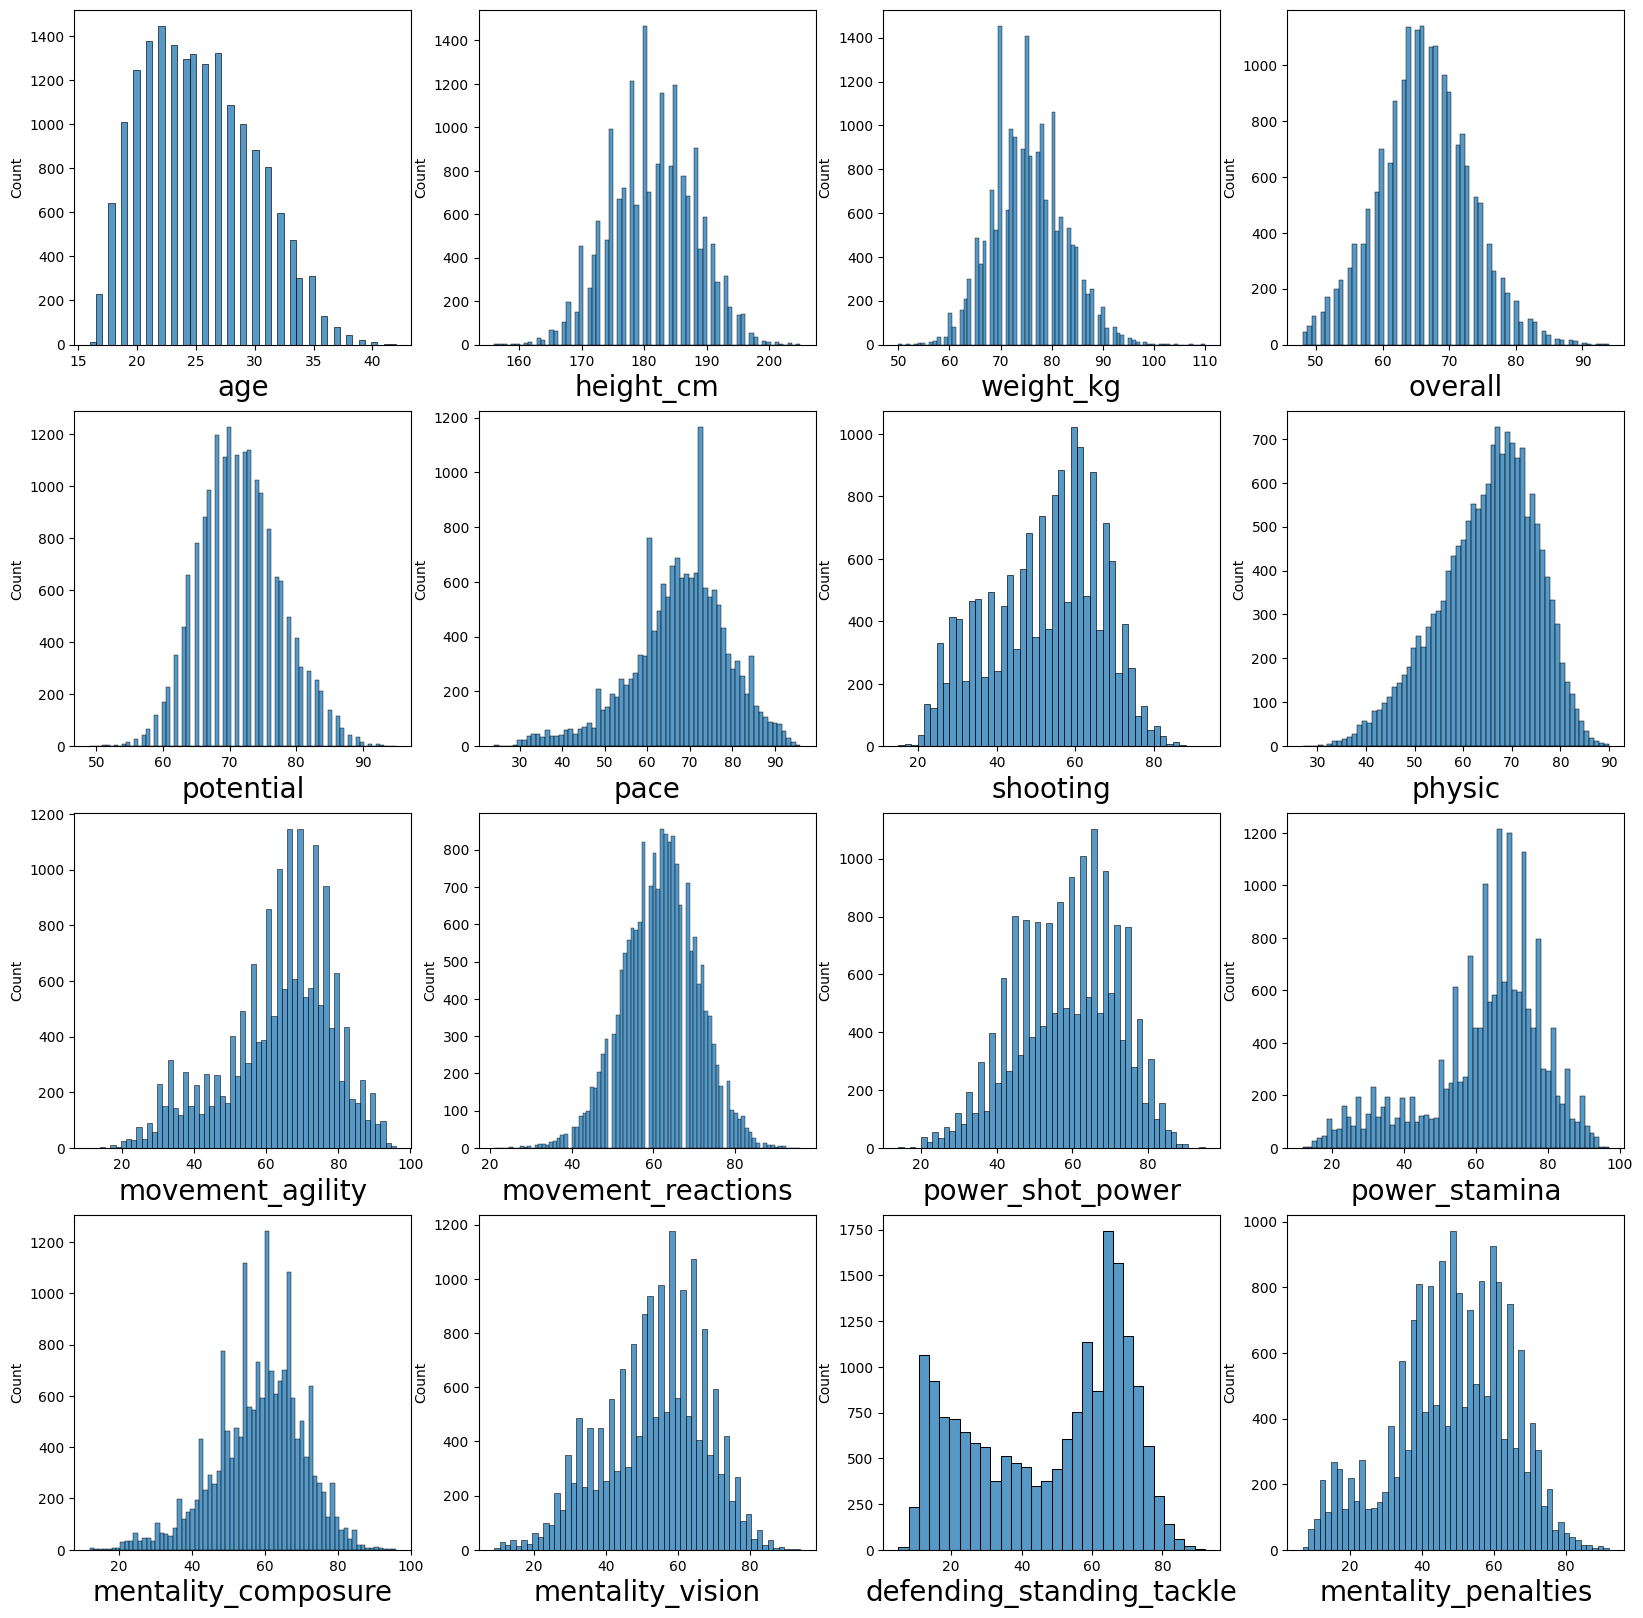

In [15]:
num_cols=['age','height_cm','weight_kg','overall','potential','pace','shooting','physic','movement_agility',
 'movement_reactions','power_shot_power','power_stamina','mentality_composure','mentality_vision',
 'defending_standing_tackle','mentality_penalties']

plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in num_cols:
    if plotnumber<=16 : 
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()


### Insights
1. We see that most of the players are in between 20 to 30 years of age.
2. The average height of players is approximately 180 cm, following a close to    normal distribution. This suggests that most players fall within an optimal    height range for professional football.
3. Most players weight between 65 to 80 kg, with the weight distribution also      following a normal pattern. This weight range aligns with the physical          requirements for maintaining speed, agility, and endurance on the field.
4. Very few players have an overall rating above 90, while the majority are        rated between 65 and 70. This indicates a significant disparity in player      performance levels, with a few elite players standing out due to exceptional    skill and international reputation.
5. Most players have the potential to achieve ratings between 65 and 75, with a    select few having the potential to exceed
   a rating of 90. This reflects the future growth prospects and career            development trajectories, highlighting potential star players.
6. The pace attribute is slightly skewed to the left, with most players having    a pace rating between 65 and 75. This distribution suggests that while many    players are moderately fast, there is room for improvement in speed training    for enhanced performance.
7. The skills for shooting, passing, dribbling, and defending are predominantly    rated between 60 and 65. This indicates that most players possess a moderate    level of technical skills.
8. The physic attribute is rated between 65 and 70 for most players, showing a    concentration of players with good physical strength and endurance.
9. The agility of players is also normally distributed, centering around a mean    value of approximately 63. This suggests that most players have moderate        agility, with fewer players having extremely high or low agility.
10. Player reactions are normally distributed with a mean around 61. This           implies that players generally have average reaction times, with fewer         players displaying very quick or slow reactions.
11. Stamina follows a normal distribution, centered around 69. This suggests       that players generally have above-average stamina, which is critical for       maintaining performance throughout the match.
12. Shot power is normally distributed, peaking around a mean value of 65. This     indicates that most players have moderate shot power, with a significant       portion having either lower or higher shot power.
13. Vision among players follows a slightly skewed normal distribution, with       most players having a vision rating around 60.This suggests that the           majority of players have average vision, crucial for  making effective         passes.
14. The ability to take penalties shows a normal distribution with a mean           around 61. Most players are moderately skilled at taking penalties,             indicating a common area for potential improvement in training.
15. Composure ratings are normally distributed around a mean of 60. This           reflects that most players maintain average composure under pressure, an       important trait for maintaining performance during crucial moments in a         game.
16. Standing tackle ability has a bimodal distribution, with peaks around 40       and 70. This suggests two distinct groups of
    players: one with average standing tackle ability and another with higher       proficiency, indicating specialized training or
    positional roles.


In [16]:
reputation=data.international_reputation.value_counts().index.to_list()
count=data.international_reputation.value_counts().values

In [17]:
fig1 = px.pie(names=reputation, values=count, title='International Reputation Rating',
 width=400, height=400, hole=0.3)
fig1.show()

### Insights
1. The majority of the respondents (91.9%) gave a rating of 1, indicating a      very positive reputation. 
2. A small percentage of respondents (6.24%) gave a rating of 2, indicating a    slightly positive reputation.
3. A very small percentage of respondents gave a rating of 3 (0.252%), 4        (0.0328%), or 5 (1.6%). This suggests that the company or organization has    a very strong reputation internationally.

In [18]:
foot=data.preferred_foot.value_counts().index.to_list()
foot_count=data.preferred_foot.value_counts().values
fig2 = px.pie(names=foot, values=foot_count, title="Distribution of Preferred Foot by the players",
             width=400,height=400 ,hole=0.3)
fig2.show()

### Insigths
1. 76.4% of the players prefer to use their right foot, while 23.6% prefer      their left foot. 
2. This indicates that a significantly higher proportion of players are          right-footed.

In [19]:
skill=data.skill_moves.value_counts().index.to_list()
skill_count=data.skill_moves.value_counts().values
fig3=px.pie(names=skill, values=skill_count, title="Rating of skill Moves of players",
           width=400,height=400,hole=0.3)
fig3.show()

###  Insights
The majority of players have a rating of 2, followed by 3. Only a small percentage of players have a rating of 4 or 5. A rating of 1 is the least common rating.

In [20]:
work=data.work_rate.value_counts().index.to_list()
work_count=data.work_rate.value_counts().values
fig4 = px.pie(names=work, values=work_count, title='Distribution of Work Rate',
 width=450, height=450, hole=0.3)
fig4

### Insights
The pie chart shows the distribution of work rates, with the highest proportion (54%) being in the Medium/Medium category. This suggests that the majority of individuals in this sample have a work rate that is neither very high nor very low.

In [21]:
cat_cols=['body_type','team_position']
data['body_type'] = data['body_type'].replace({'PLAYER_BODY_TYPE_25':'body_type_25'})
fig = make_subplots(rows=len(cat_cols), cols=1, subplot_titles=cat_cols)
for i, col in enumerate(cat_cols):
    fig.add_trace(px.bar(data[col].value_counts(), x=data[col].value_counts().index, y=data[col].value_counts().values,
                         labels={'x': col, 'y':'Frequency'}, color_discrete_sequence=['blue']).data[0], row=i+1,col=1)
fig.update_layout(height=500*len(cat_cols), width=800, title='Categorical Column Distributions')
fig.show()

In [22]:
x1=data.nationality.value_counts().index.to_list()
y1=data.nationality.value_counts().values

x2=data.club.value_counts().index.to_list()
y2=data.club.value_counts().values


In [23]:
x1=x1[0:10]
y1=y1[0:10]
x2=x2[0:50]
y2=y2[0:50]

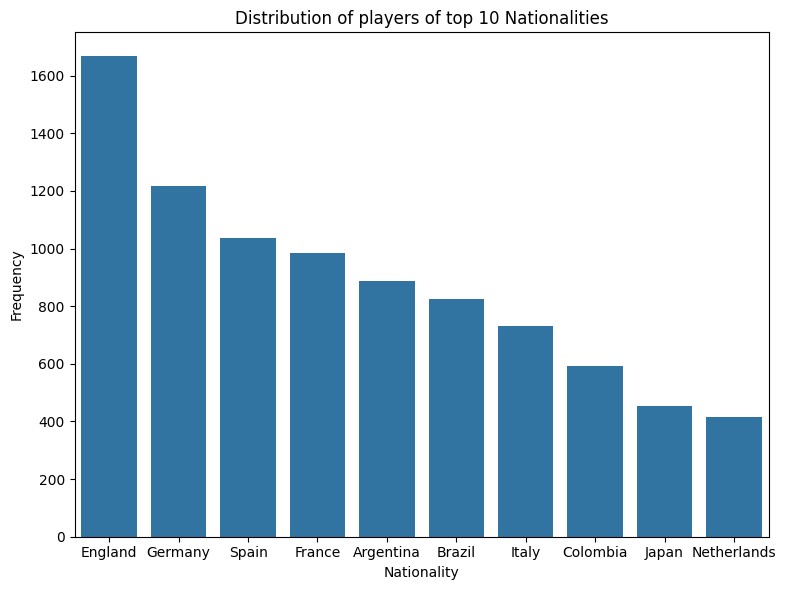

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=x1, y=y1)
plt.title("Distribution of players of top 10 Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.tight_layout()    
plt.show()

### Insights
The high representation of players from England, Germany, Spain and France reflects the strong footballing traditions
and infrastructure in these countries.


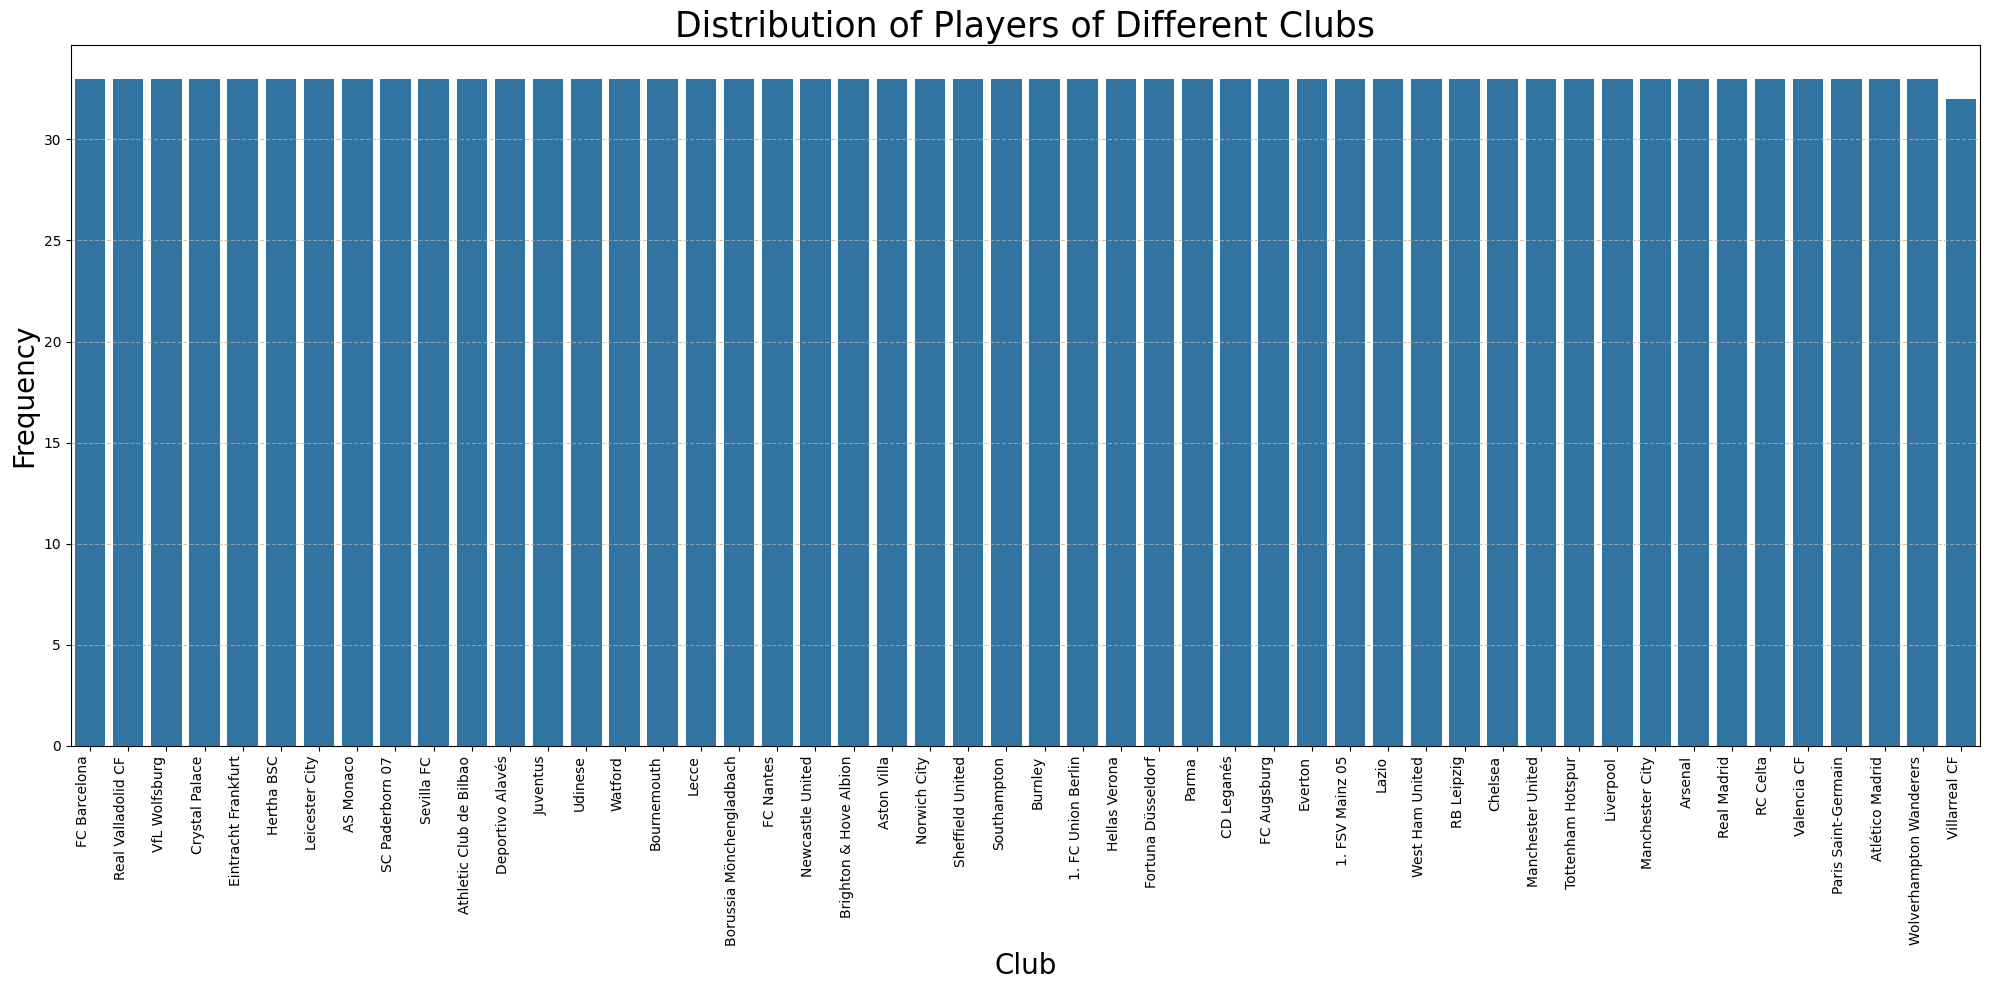

In [25]:
plt.figure(figsize=(20, 10)) 
sns.barplot(x=x2, y=y2)

plt.title("Distribution of Players of Different Clubs", fontsize=25)  
plt.xlabel("Club", fontsize=20)  
plt.ylabel("Frequency", fontsize=20)  
plt.xticks(rotation=90, ha="right")
plt.tight_layout()  

 # Remove top and right spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

### Insight
The presence of multiple clubs with similar levels of representation highlights the competitive balance.
50 teams have 33 players each.


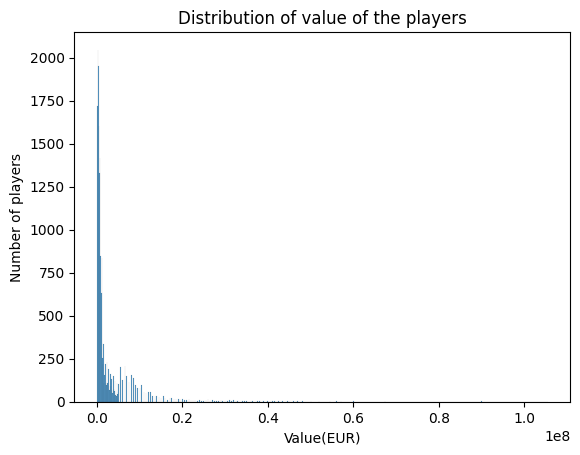

In [26]:
sns.histplot(x='value_eur',data=data)
plt.title("Distribution of value of the players")
plt.xlabel("Value(EUR)")
plt.ylabel("Number of players")
plt.show()

## Bivariate Analysis

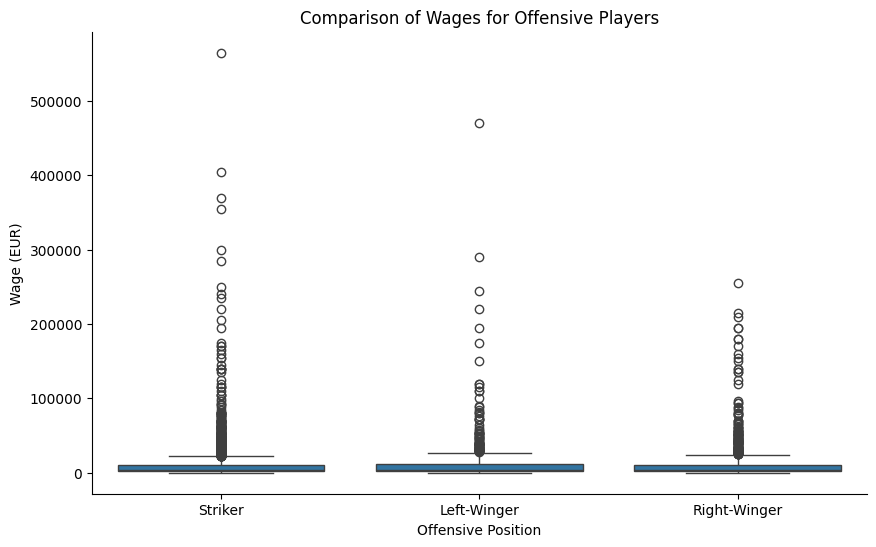

In [27]:
offensive_positions = ['ST', 'RW', 'LW']
offensive_players = data[data['player_positions'].str.contains('|'.join(offensive_positions))]

def map_position(position):
    if 'ST' in position:
        return 'Striker'
    elif 'RW' in position:
        return 'Right-Winger'
    elif 'LW' in position:
        return 'Left-Winger'
    else:
        return 'Other'

offensive_players['offensive_position'] = offensive_players['player_positions'].apply(map_position)
offensive_players = offensive_players[offensive_players['offensive_position'].isin(['Striker', 'Right-Winger', 'Left-Winger'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='offensive_position', y='wage_eur', data=offensive_players)

plt.title('Comparison of Wages for Offensive Players')
plt.xlabel('Offensive Position')
plt.ylabel('Wage (EUR)')

sns.set_palette(['red', 'blue', 'green'])
sns.despine()

plt.show()

### Insights
The striker get paid more as compare to Left-Winger and Right-Winger

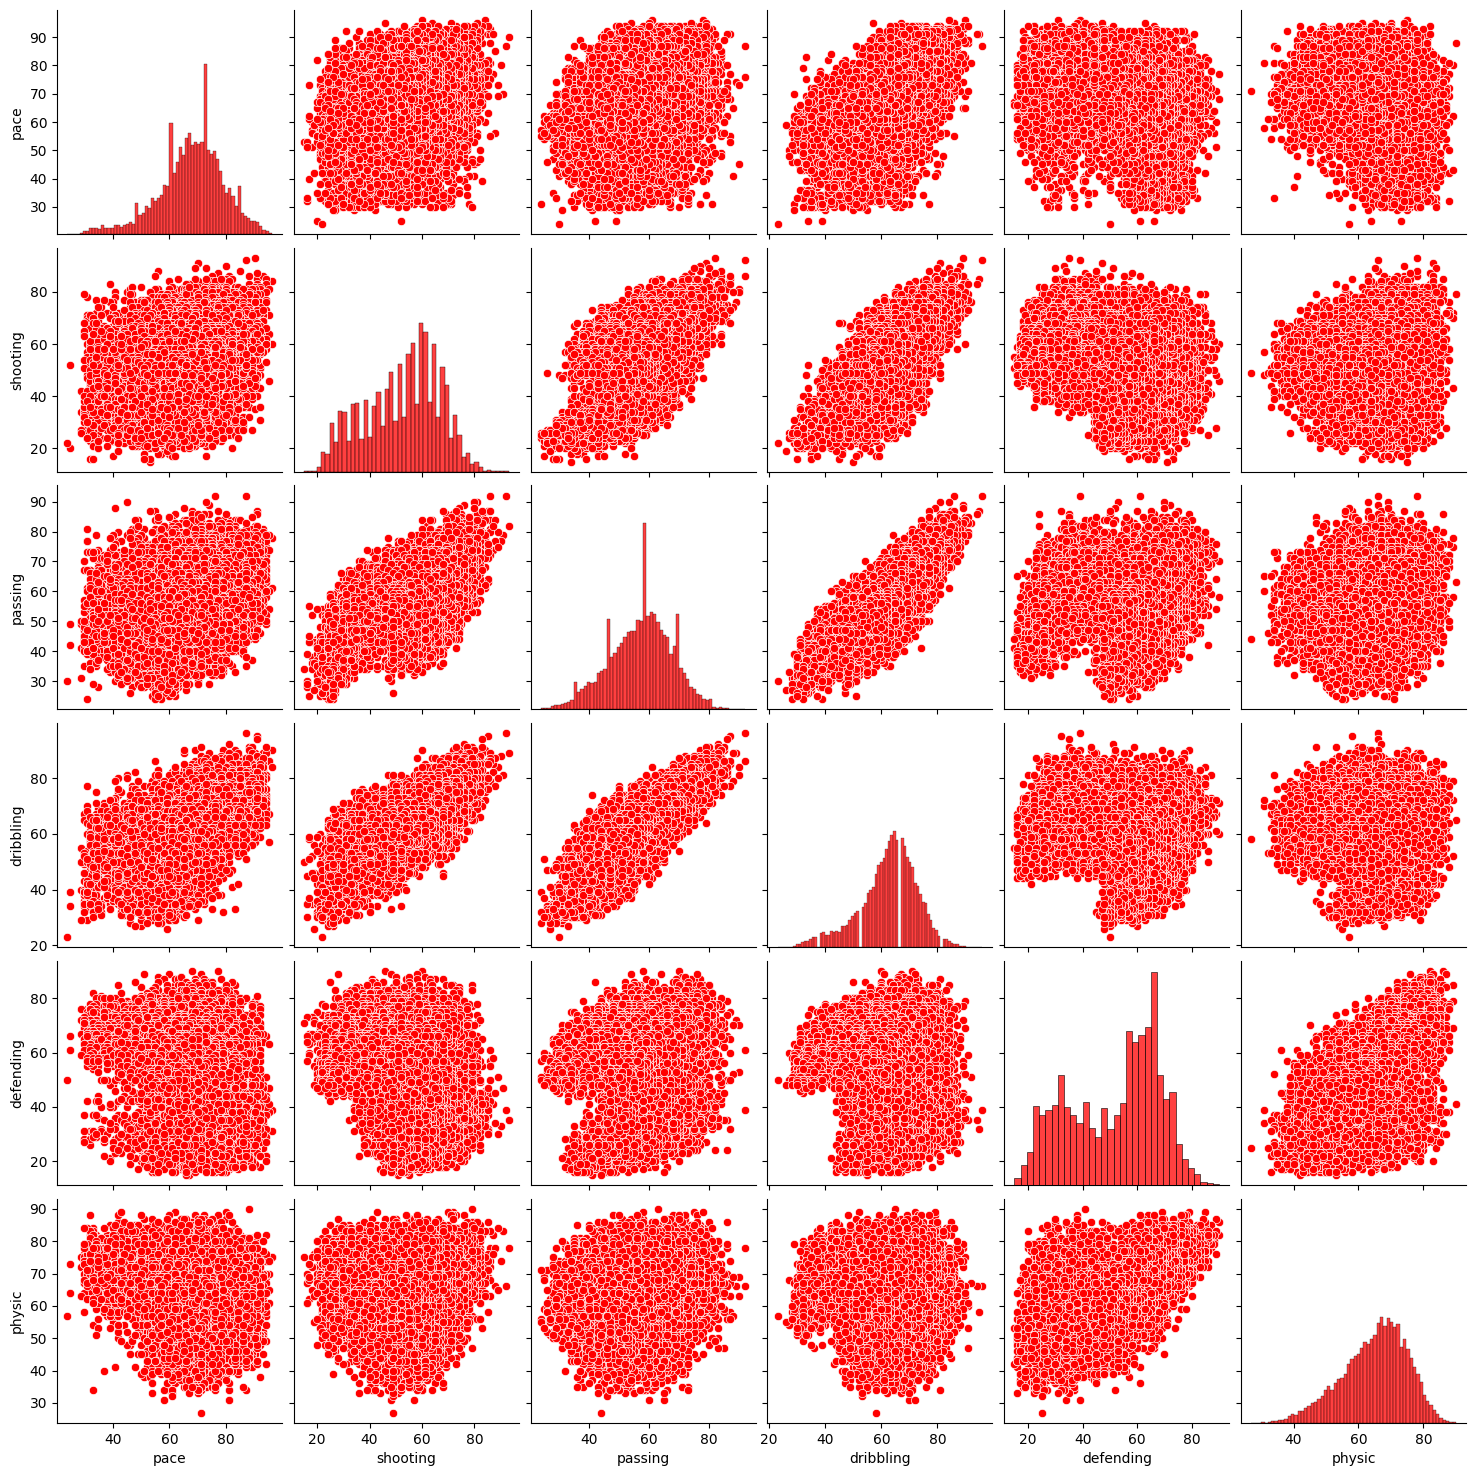

In [28]:
sns.pairplot(data[['pace','shooting','passing','dribbling','defending','physic']])
plt.show()

### Insights
1. Players who excel in dribbling tend to have strong shooting capabilities as    well.
2. A positive correlation exists between passing and shooting.
3. A positive correlation seen between dribbling and passing.

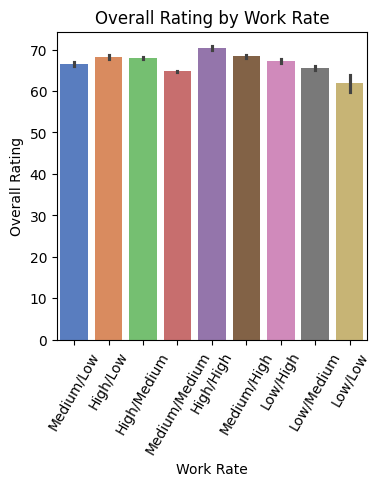

In [29]:
plt.figure(figsize=(4,4))
colors=sns.color_palette('muted')
sns.barplot(data,x='work_rate', y='overall',palette=colors)
plt.xticks(rotation=60)
plt.title('Overall Rating by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Overall Rating')
plt.show()

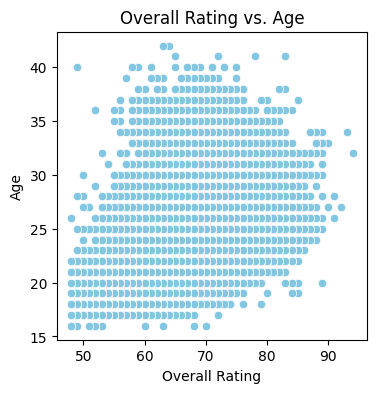

In [30]:
plt.figure(figsize=(4,4))

sns.scatterplot(data,x='overall', y='age',color=colors[9])
plt.title('Overall Rating vs. Age')
plt.xlabel('Overall Rating')
plt.ylabel('Age')
plt.show()

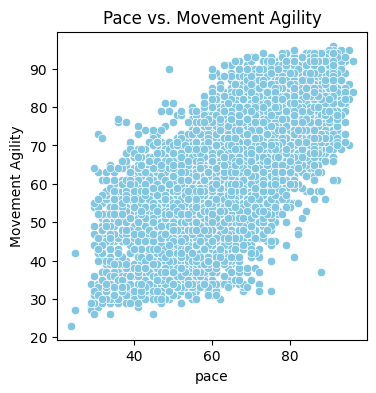

In [31]:
plt.figure(figsize=(4,4))
sns.scatterplot(data,x='pace', y='movement_agility',color=colors[9])
plt.title('Pace vs. Movement Agility')
plt.xlabel("pace")
plt.ylabel("Movement Agility")
plt.show()

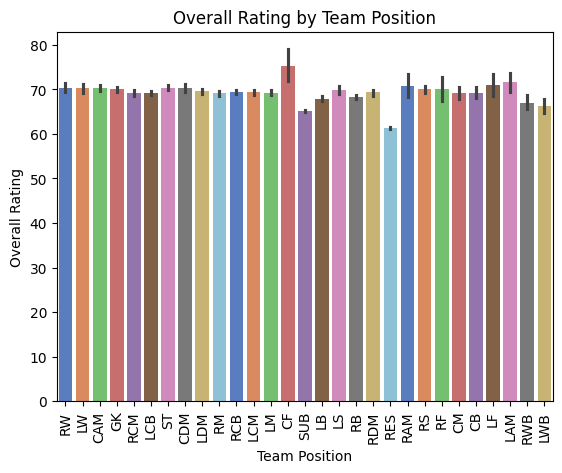

In [32]:
sns.barplot(data,y='overall',x='team_position',palette=colors)
plt.title('Overall Rating by Team Position')
plt.xlabel('Team Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)

plt.show()


Text(0, 0.5, 'Overall Rating')

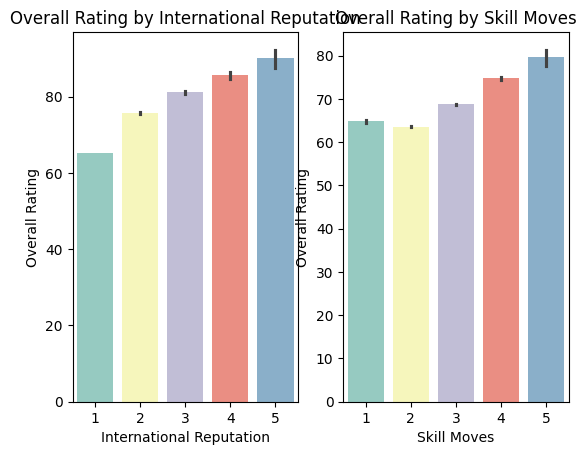

In [33]:
plt.subplot(1,2,1)
sns.barplot(data,y='overall',x='international_reputation',palette="Set3")
plt.title('Overall Rating by International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Overall Rating')
plt.subplot(1,2,2)
sns.barplot(data,y='overall',x='skill_moves',palette="Set3")
plt.title('Overall Rating by Skill Moves')
plt.xlabel('Skill Moves')
plt.ylabel('Overall Rating')

### Insights
1. Players with 'High' work rates in either offense, defense, or both tend to      have higher overall ratings.
2. There is a noticeable peak in overall ratings around the ages of 25 to 30,      indicating that players are often at their prime
   during these years.
3. Younger players (<20) and older players (>35) tend to have lower overall        ratings.
4. A positive correlation exists between pace and movement agility, indicating    that faster players are often more agile.
5. The distribution of overall ratings is relatively uniform across different      team positions, although certain positions such as
   'CB' (Center Back) and 'GK' (Goalkeeper) show slightly higher variability.
6. Players with higher international reputations tend to have significantly        higher overall ratings.
7. Players with higher skill moves ratings tend to have higher overall            ratings.This suggests that technical skills, reflected by skill moves, are      crucial for achieving higher overall ratings.


## Data Preprocessing

### Droping unwanted columns

In [34]:
unwanted_columns=['sofifa_id','player_url','long_name','dob','player_tags','team_jersey_number','nation_jersey_number',
         'player_traits','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm',
         'lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','short_name','nationality',"club"] 
data.drop(unwanted_columns,axis=1,inplace=True)

In [35]:
data

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur   
0       32        170         72       94         94   95500000    565000  \
1       34        187         83       93         93   58500000    405000   
2       27        175         68       92         92  105500000    290000   
3       26        188         87       91         93   77500000    125000   
4       28        175         74       91         91   90000000    470000   
...    ...        ...        ...      ...        ...        ...       ...   
18273   22        186         79       48         56      40000      2000   
18274   22        177         66       48         56      40000      2000   
18275   19        186         75       48         56      40000      1000   
18276   18        185         74       48         54      40000      1000   
18277   26        182         78       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot   
0           RW, CF, ST           Left                         5          4  \
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                         1          2   
18275               CM          Right                         1          2   
18276               CM          Right                         1          2   
18277               CM          Right                         1          3   

       skill_moves      work_rate   body_type real_face  release_clause_eur   
0                4     Medium/Low       Messi       Yes         195800000.0  \
1                5       High/Low  C. Ronaldo       Yes          96500000.0   
2                5    High/Medium      Neymar       Yes         195200000.0   
3                1  Medium/Medium      Normal       Yes         164700000.0   
4                4    High/Medium      Normal       Yes         184500000.0   
...            ...            ...         ...       ...                 ...   
18273            2    Medium/High      Normal        No             70000.0   
18274            2  Medium/Medium      Normal        No             72000.0   
18275            2     Low/Medium        Lean        No             70000.0   
18276            2        Low/Low        Lean        No             70000.0   
18277            2  Medium/Medium      Normal        No                 NaN   

      team_position      loaned_from      joined  contract_valid_until   
0                RW              NaN  2004-07-01                2021.0  \
1                LW              NaN  2018-07-10                2022.0   
2               CAM              NaN  2017-08-03                2022.0   
3                GK              NaN  2014-07-16                2023.0   
4                LW              NaN  2019-07-01                2024.0   
...             ...              ...         ...                   ...   
18273           RES              NaN  2018-07-13                2019.0   
18274           SUB              NaN  2019-02-01                2022.0   
18275           SUB              NaN  2019-01-01                2019.0   
18276           SUB              NaN  2019-02-01                2022.0   
18277           SUB  Tianjin TEDA FC         NaN                2019.0   

      nation_position  pace  shooting  passing  dribbling  defending  physic   
0                 NaN  87.0      92.0     92.0       96.0       39.0    66.0  \
1                  LS  90.0      93.0     82.0       89.0       35.0    78.0   
2                  LW  91.0      85.0     87.0       95.0       32.

### Insights
1. 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm'  ,'rm','lwb','ldm','cdm','rdm',
2. rwb','lb','lcb','cb','rcb','rb' dropping player ratings for each individual    position as they are already contained in other
   columns or could be determined from other columns.
3. Dropping unnecessary columns like sofifa_id','player_url','long_name','dob'.
4. player_tags,player_traits dependent on their skills, for which we already      have rated columns, so considering dropping it.
5. team_jersey_number, nation_jersey_number are unnecessary columns, so            dropping it for better analysis.
6. Dropping short_name','nationality',"club" since these are high cardinality      columns, may impact the analysis.

In [36]:
data['player_positions']=data['player_positions'].str.split(',').str[0]

In [37]:
data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur   
0   32        170         72       94         94   95500000    565000  \
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot   
0               RW           Left                         5          4  \
1               ST          Right                         5          4   
2               LW          Right                         5          5   
3               GK          Right                         3          3   
4               LW          Right                         4          4   

   skill_moves      work_rate   body_type real_face  release_clause_eur   
0            4     Medium/Low       Messi       Yes         195800000.0  \
1            5       High/Low  C. Ronaldo       Yes          96500000.0   
2            5    High/Medium      Neymar       Yes         195200000.0   
3            1  Medium/Medium      Normal       Yes         164700000.0   
4            4    High/Medium      Normal       Yes         184500000.0   

  team_position loaned_from      joined  contract_valid_until nation_position   
0            RW         NaN  2004-07-01                2021.0             NaN  \
1            LW         NaN  2018-07-10                2022.0              LS   
2           CAM         NaN  2017-08-03                2022.0              LW   
3            GK         NaN  2014-07-16                2023.0              GK   
4            LW         NaN  2019-07-01                2024.0              LF   

   pace  shooting  passing  dribbling  defending  physic  gk_diving   
0  87.0      92.0     92.0       96.0       39.0    66.0        NaN  \
1  90.0      93.0     82.0       89.0       35.0    78.0        NaN   
2  91.0      85.0     87.0       95.0       32.0    58.0        NaN   
3   NaN       NaN      NaN        NaN        NaN     NaN       87.0   
4  91.0      83.0     86.0       94.0       35.0    66.0        NaN   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning   
0          NaN         NaN          NaN       NaN             NaN  \
1          NaN         NaN          NaN       NaN             NaN   
2          NaN         NaN          NaN       NaN             NaN   
3         92.0        78.0         89.0      52.0            90.0   
4          NaN         NaN          NaN       NaN             NaN   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy   
0                  88                   95                          70  \
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve   
0                       92                 88               97           93  \
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control   
0                 94                  92                  96  \
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement

### Converting date columns into datatime format

In [38]:
data['joined'] = pd.to_datetime(data['joined'],format='%Y-%m-%d')
data['contract_valid_until']=pd.to_datetime(data['contract_valid_until'],format='%Y')

### Checking Null Values

In [39]:
data.isnull().sum()[data.isnull().sum()>0].count()

18

In [40]:
null_columns=data.isnull().sum()[data.isnull().sum()>0]
null_columns

release_clause_eur       1298
team_position             240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
dtype: int64

In [41]:
data.isnull().sum()[data.isnull().sum()>0.5*len(data)]

loaned_from        17230
nation_position    17152
gk_diving          16242
gk_handling        16242
gk_kicking         16242
gk_reflexes        16242
gk_speed           16242
gk_positioning     16242
dtype: int64

In [42]:
missing_columns=data.isnull().sum()[data.isnull().sum()>0.5*len(data)].index.to_list()

In [43]:
data.drop(missing_columns,axis=1,inplace=True)

In [44]:
data

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur   
0       32        170         72       94         94   95500000    565000  \
1       34        187         83       93         93   58500000    405000   
2       27        175         68       92         92  105500000    290000   
3       26        188         87       91         93   77500000    125000   
4       28        175         74       91         91   90000000    470000   
...    ...        ...        ...      ...        ...        ...       ...   
18273   22        186         79       48         56      40000      2000   
18274   22        177         66       48         56      40000      2000   
18275   19        186         75       48         56      40000      1000   
18276   18        185         74       48         54      40000      1000   
18277   26        182         78       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot   
0                   RW           Left                         5          4  \
1                   ST          Right                         5          4   
2                   LW          Right                         5          5   
3                   GK          Right                         3          3   
4                   LW          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                         1          2   
18275               CM          Right                         1          2   
18276               CM          Right                         1          2   
18277               CM          Right                         1          3   

       skill_moves      work_rate   body_type real_face  release_clause_eur   
0                4     Medium/Low       Messi       Yes         195800000.0  \
1                5       High/Low  C. Ronaldo       Yes          96500000.0   
2                5    High/Medium      Neymar       Yes         195200000.0   
3                1  Medium/Medium      Normal       Yes         164700000.0   
4                4    High/Medium      Normal       Yes         184500000.0   
...            ...            ...         ...       ...                 ...   
18273            2    Medium/High      Normal        No             70000.0   
18274            2  Medium/Medium      Normal        No             72000.0   
18275            2     Low/Medium        Lean        No             70000.0   
18276            2        Low/Low        Lean        No             70000.0   
18277            2  Medium/Medium      Normal        No                 NaN   

      team_position     joined contract_valid_until  pace  shooting  passing   
0                RW 2004-07-01           2021-01-01  87.0      92.0     92.0  \
1                LW 2018-07-10           2022-01-01  90.0      93.0     82.0   
2               CAM 2017-08-03           2022-01-01  91.0      85.0     87.0   
3                GK 2014-07-16           2023-01-01   NaN       NaN      NaN   
4                LW 2019-07-01           2024-01-01  91.0      83.0     86.0   
...             ...        ...                  ...   ...       ...      ...   
18273           RES 2018-07-13           2019-01-01  57.0      23.0     28.0   
18274           SUB 2019-02-01           2022-01-01  58.0      24.0     33.0   
18275           SUB 2019-01-01           2019-01-01  54.0      35.0     44.0   
18276           SUB 2019-02-01           2022-01-01  59.0      35.0     47.0   
18277           SUB        NaT           2019-01-01  60.0      32.0     51.0   

       dribbling  defending  physic  attacking_crossing  attacking_finishing   
0           96.0       39.0    66.0                  88                   95  \
1           89.0       35.0    78.0                  84                   9

### Insights
1. Total 18 columns have null values.
2. There are total 8 columns with more than 50% of the values being null,      dropping these columns for better analysis.
3. Imputing columns with less than 50% missing values.

## Imputing Null Values

In [45]:
imputing_values=data.isnull().sum()[(data.isnull().sum()<0.5*len(data)) & (data.isnull().sum()>0)].index.to_list()
imputing_values

['release_clause_eur',
 'team_position',
 'joined',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

In [46]:
columns_remove=[1,2,3]
imputing_values=[col for idx,col in enumerate(imputing_values) if idx not in columns_remove]

In [47]:
def imputer(data,col):
    m=np.median(data[col].dropna())
    data[col]=data[col].apply(lambda x:m if pd.isna(x) else x)

In [48]:
for col in imputing_values:
    imputer(data,col)

In [49]:
 a=data.team_position.loc[data.team_position.isnull()==True].index.to_list()

## 

### Imputing Values of player position with corresponding team position values

In [50]:
data.loc[a,'team_position']=data.player_positions.loc[data.team_position.isnull()==True].values

In [51]:
data['joined'].fillna(data['joined'].mode()[0], inplace=True)
data['contract_valid_until'].fillna(data['contract_valid_until'].mode()[0], inplace=True)

### Handling datetime columns

In [52]:
data['tenure_years'] = data['contract_valid_until'].dt.year - data['joined'].dt.year

In [53]:
data.drop(['joined','contract_valid_until'],axis=1,inplace=True)

### Handling Outliers

In [54]:
var=['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur','wage_eur','release_clause_eur', 'pace',
 'shooting', 'passing', 'dribbling', 'physic','attacking_heading_accuracy', 'attacking_short_passing',
 'skill_dribbling','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control','movement_acceleration',
 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power',
 'power_jumping', 'power_stamina', 'power_strength','mentality_positioning', 'mentality_vision',
 'mentality_composure','goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking',
 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [55]:
len(var)

36

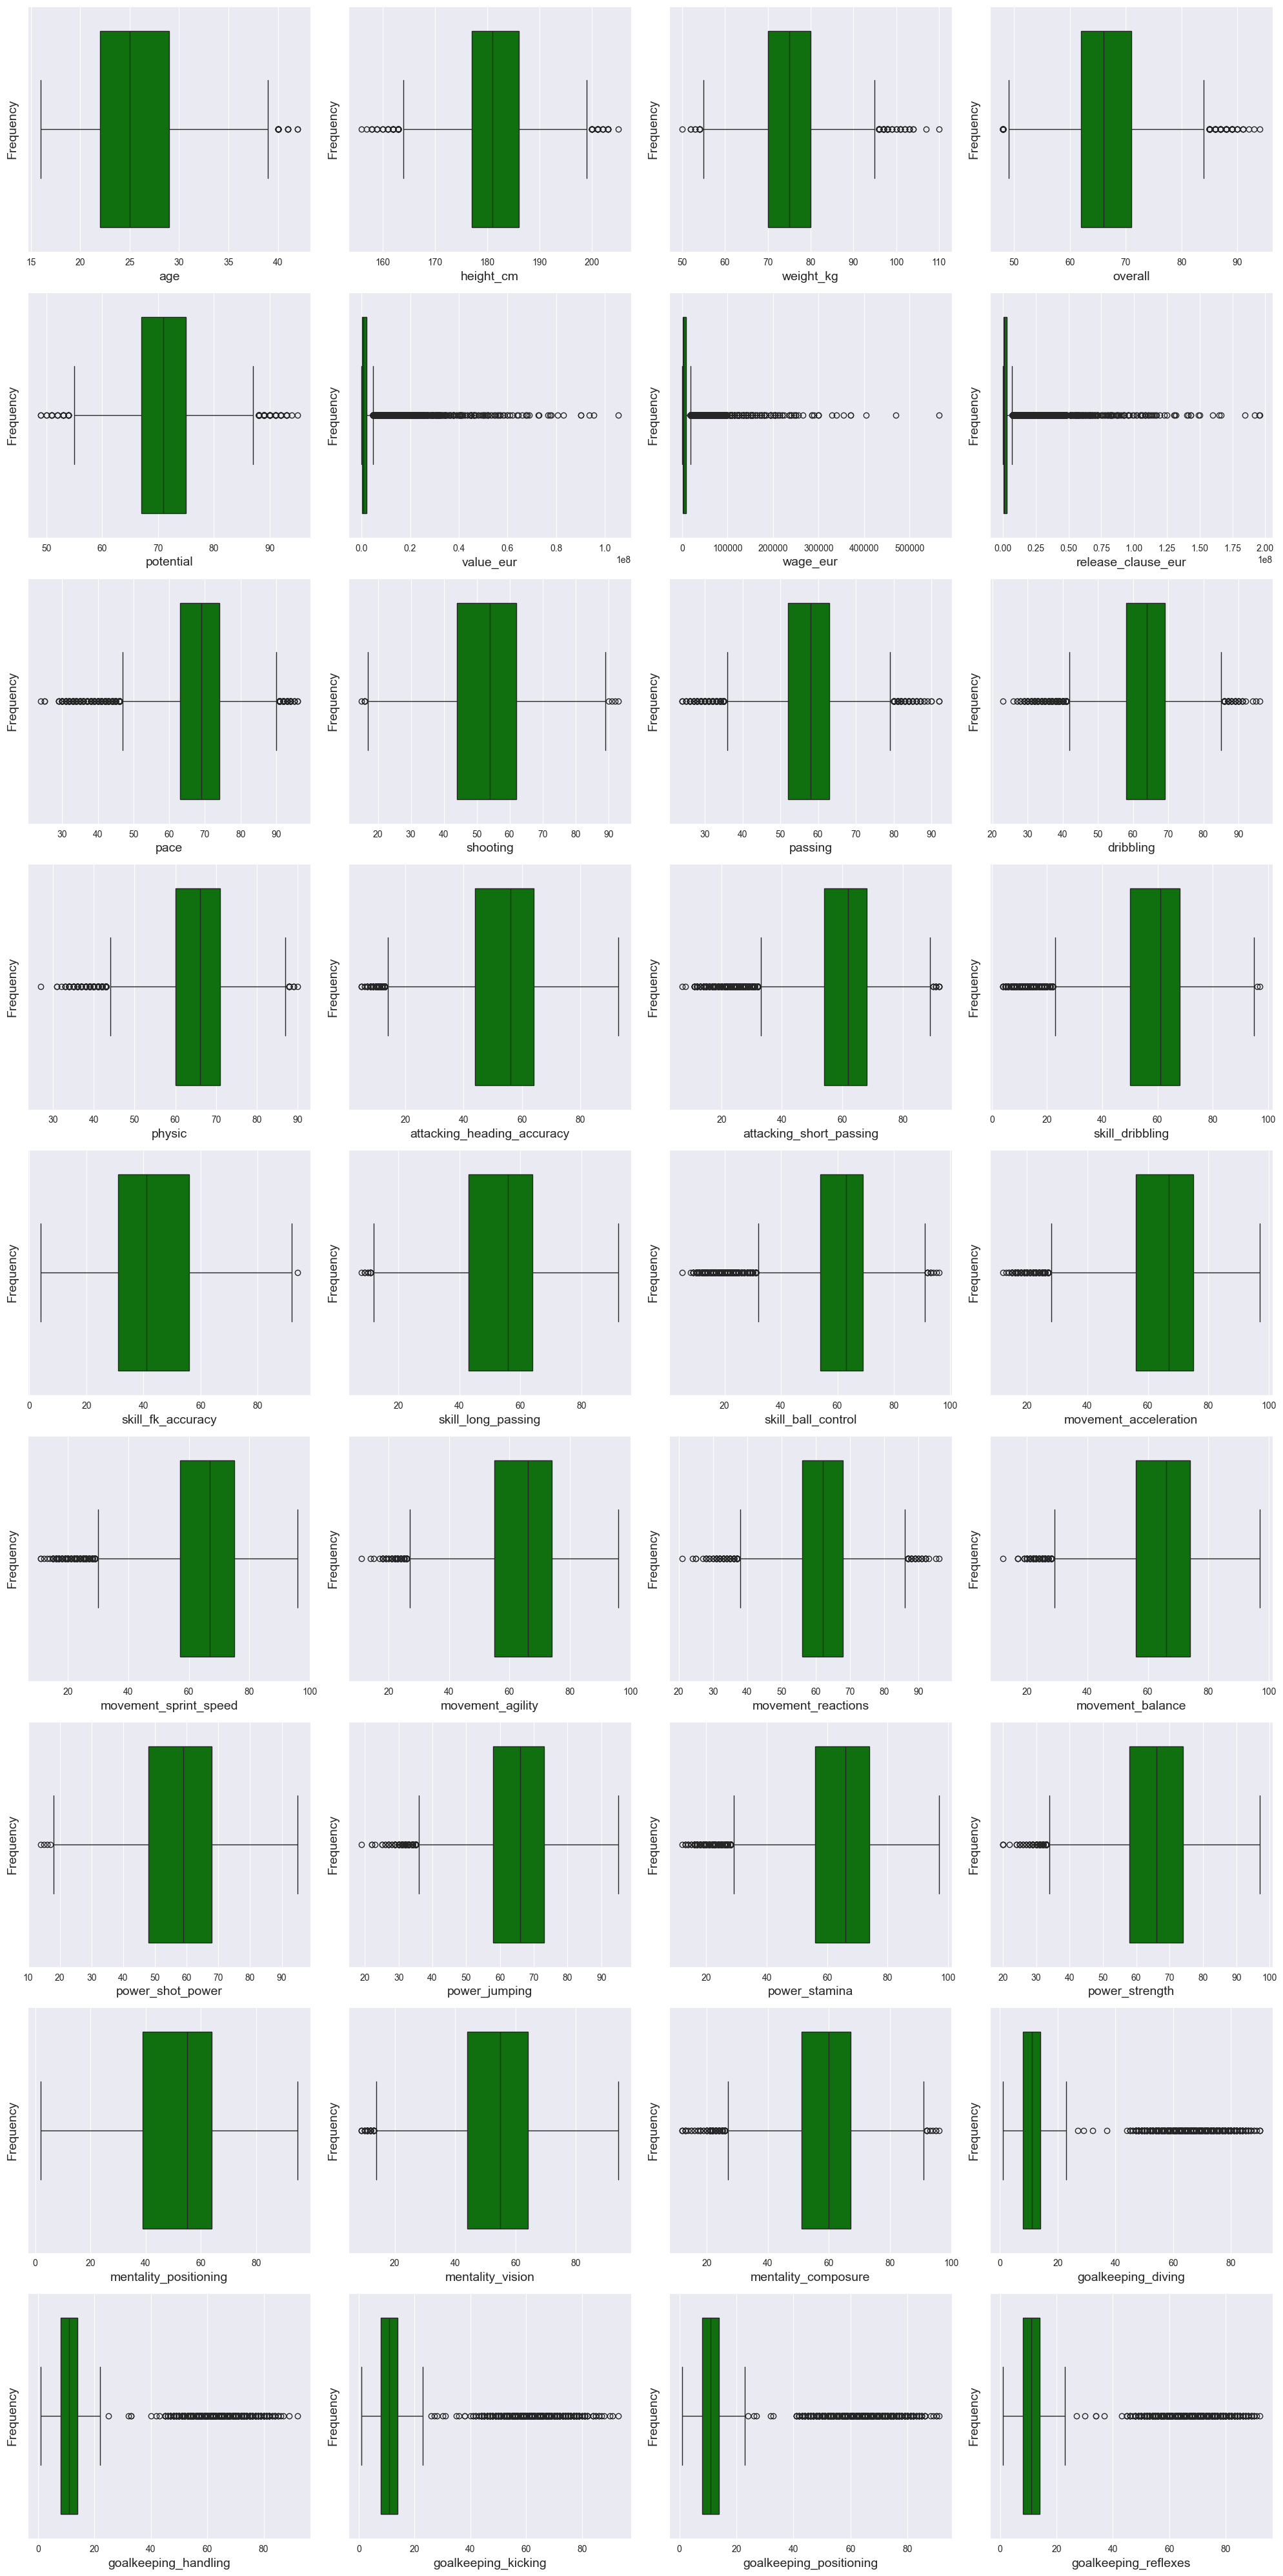

In [56]:
plt.figure(figsize=(20,40))
sns.set_style('darkgrid')

plot=1
for col in var:
    if plot<=36:
        plt.subplot(9,4,plot)
        sns.boxplot(data=data, x=col, color='green')
        plt.xlabel(col,fontsize=14)
        plt.ylabel('Frequency',fontsize=14)
        plot+=1
plt.tight_layout()

### IQR Method

In [57]:
Q1=data[var].quantile(0.25)
Q3=data[var].quantile(0.75)


IQR=Q3-Q1

min_range=Q1-1.5*IQR
max_range=Q3+1.5*IQR

In [58]:
outlier_count = ((data[var]>max_range) | (data[var]<min_range)).sum()
print(outlier_count)



age                             19
height_cm                       89
weight_kg                       73
overall                        151
potential                      145
value_eur                     2511
wage_eur                      2360
release_clause_eur            2809
pace                           954
shooting                         9
passing                        564
dribbling                      814
physic                         433
attacking_heading_accuracy    1068
attacking_short_passing       1734
skill_dribbling               2035
skill_fk_accuracy                1
skill_long_passing              13
skill_ball_control            2051
movement_acceleration          405
movement_sprint_speed          499
movement_agility               209
movement_reactions             161
movement_balance               248
power_shot_power                 4
power_jumping                  426
power_stamina                  923
power_strength                 266
mentality_positionin

In [59]:
#outlier percentage
outlier_per=(outlier_count/len(var))*100
print(outlier_per)

age                             52.777778
height_cm                      247.222222
weight_kg                      202.777778
overall                        419.444444
potential                      402.777778
value_eur                     6975.000000
wage_eur                      6555.555556
release_clause_eur            7802.777778
pace                          2650.000000
shooting                        25.000000
passing                       1566.666667
dribbling                     2261.111111
physic                        1202.777778
attacking_heading_accuracy    2966.666667
attacking_short_passing       4816.666667
skill_dribbling               5652.777778
skill_fk_accuracy                2.777778
skill_long_passing              36.111111
skill_ball_control            5697.222222
movement_acceleration         1125.000000
movement_sprint_speed         1386.111111
movement_agility               580.555556
movement_reactions             447.222222
movement_balance               688

## Feature Selection

Handiling Highly correlated columns

In [60]:
corr_matrix = data[var].corr()

threshold = 0.85
high_corr_columns = corr_matrix.abs()>threshold

for col in high_corr_columns:
    high_corr_columns[col].loc[col]=False
    
high_corr_paris = high_corr_columns[high_corr_columns.any(axis=1)]
high_corr_paris

print('Highly correlated columns:')
for col in high_corr_paris.columns:
    for idx in high_corr_paris.index:
        if high_corr_paris.at[idx,col]:
            print(f"{idx} and {col}: {corr_matrix.at[idx, col]:.2f}")

Highly correlated columns:
movement_reactions and overall: 0.86
wage_eur and value_eur: 0.86
release_clause_eur and value_eur: 0.98
value_eur and wage_eur: 0.86
value_eur and release_clause_eur: 0.98
skill_dribbling and attacking_short_passing: 0.85
skill_long_passing and attacking_short_passing: 0.90
skill_ball_control and attacking_short_passing: 0.92
attacking_short_passing and skill_dribbling: 0.85
skill_ball_control and skill_dribbling: 0.94
mentality_positioning and skill_dribbling: 0.90
attacking_short_passing and skill_long_passing: 0.90
attacking_short_passing and skill_ball_control: 0.92
skill_dribbling and skill_ball_control: 0.94
mentality_positioning and skill_ball_control: 0.87
movement_sprint_speed and movement_acceleration: 0.92
movement_acceleration and movement_sprint_speed: 0.92
overall and movement_reactions: 0.86
skill_dribbling and mentality_positioning: 0.90
skill_ball_control and mentality_positioning: 0.87
goalkeeping_handling and goalkeeping_diving: 0.97
goalk

<Axes: >

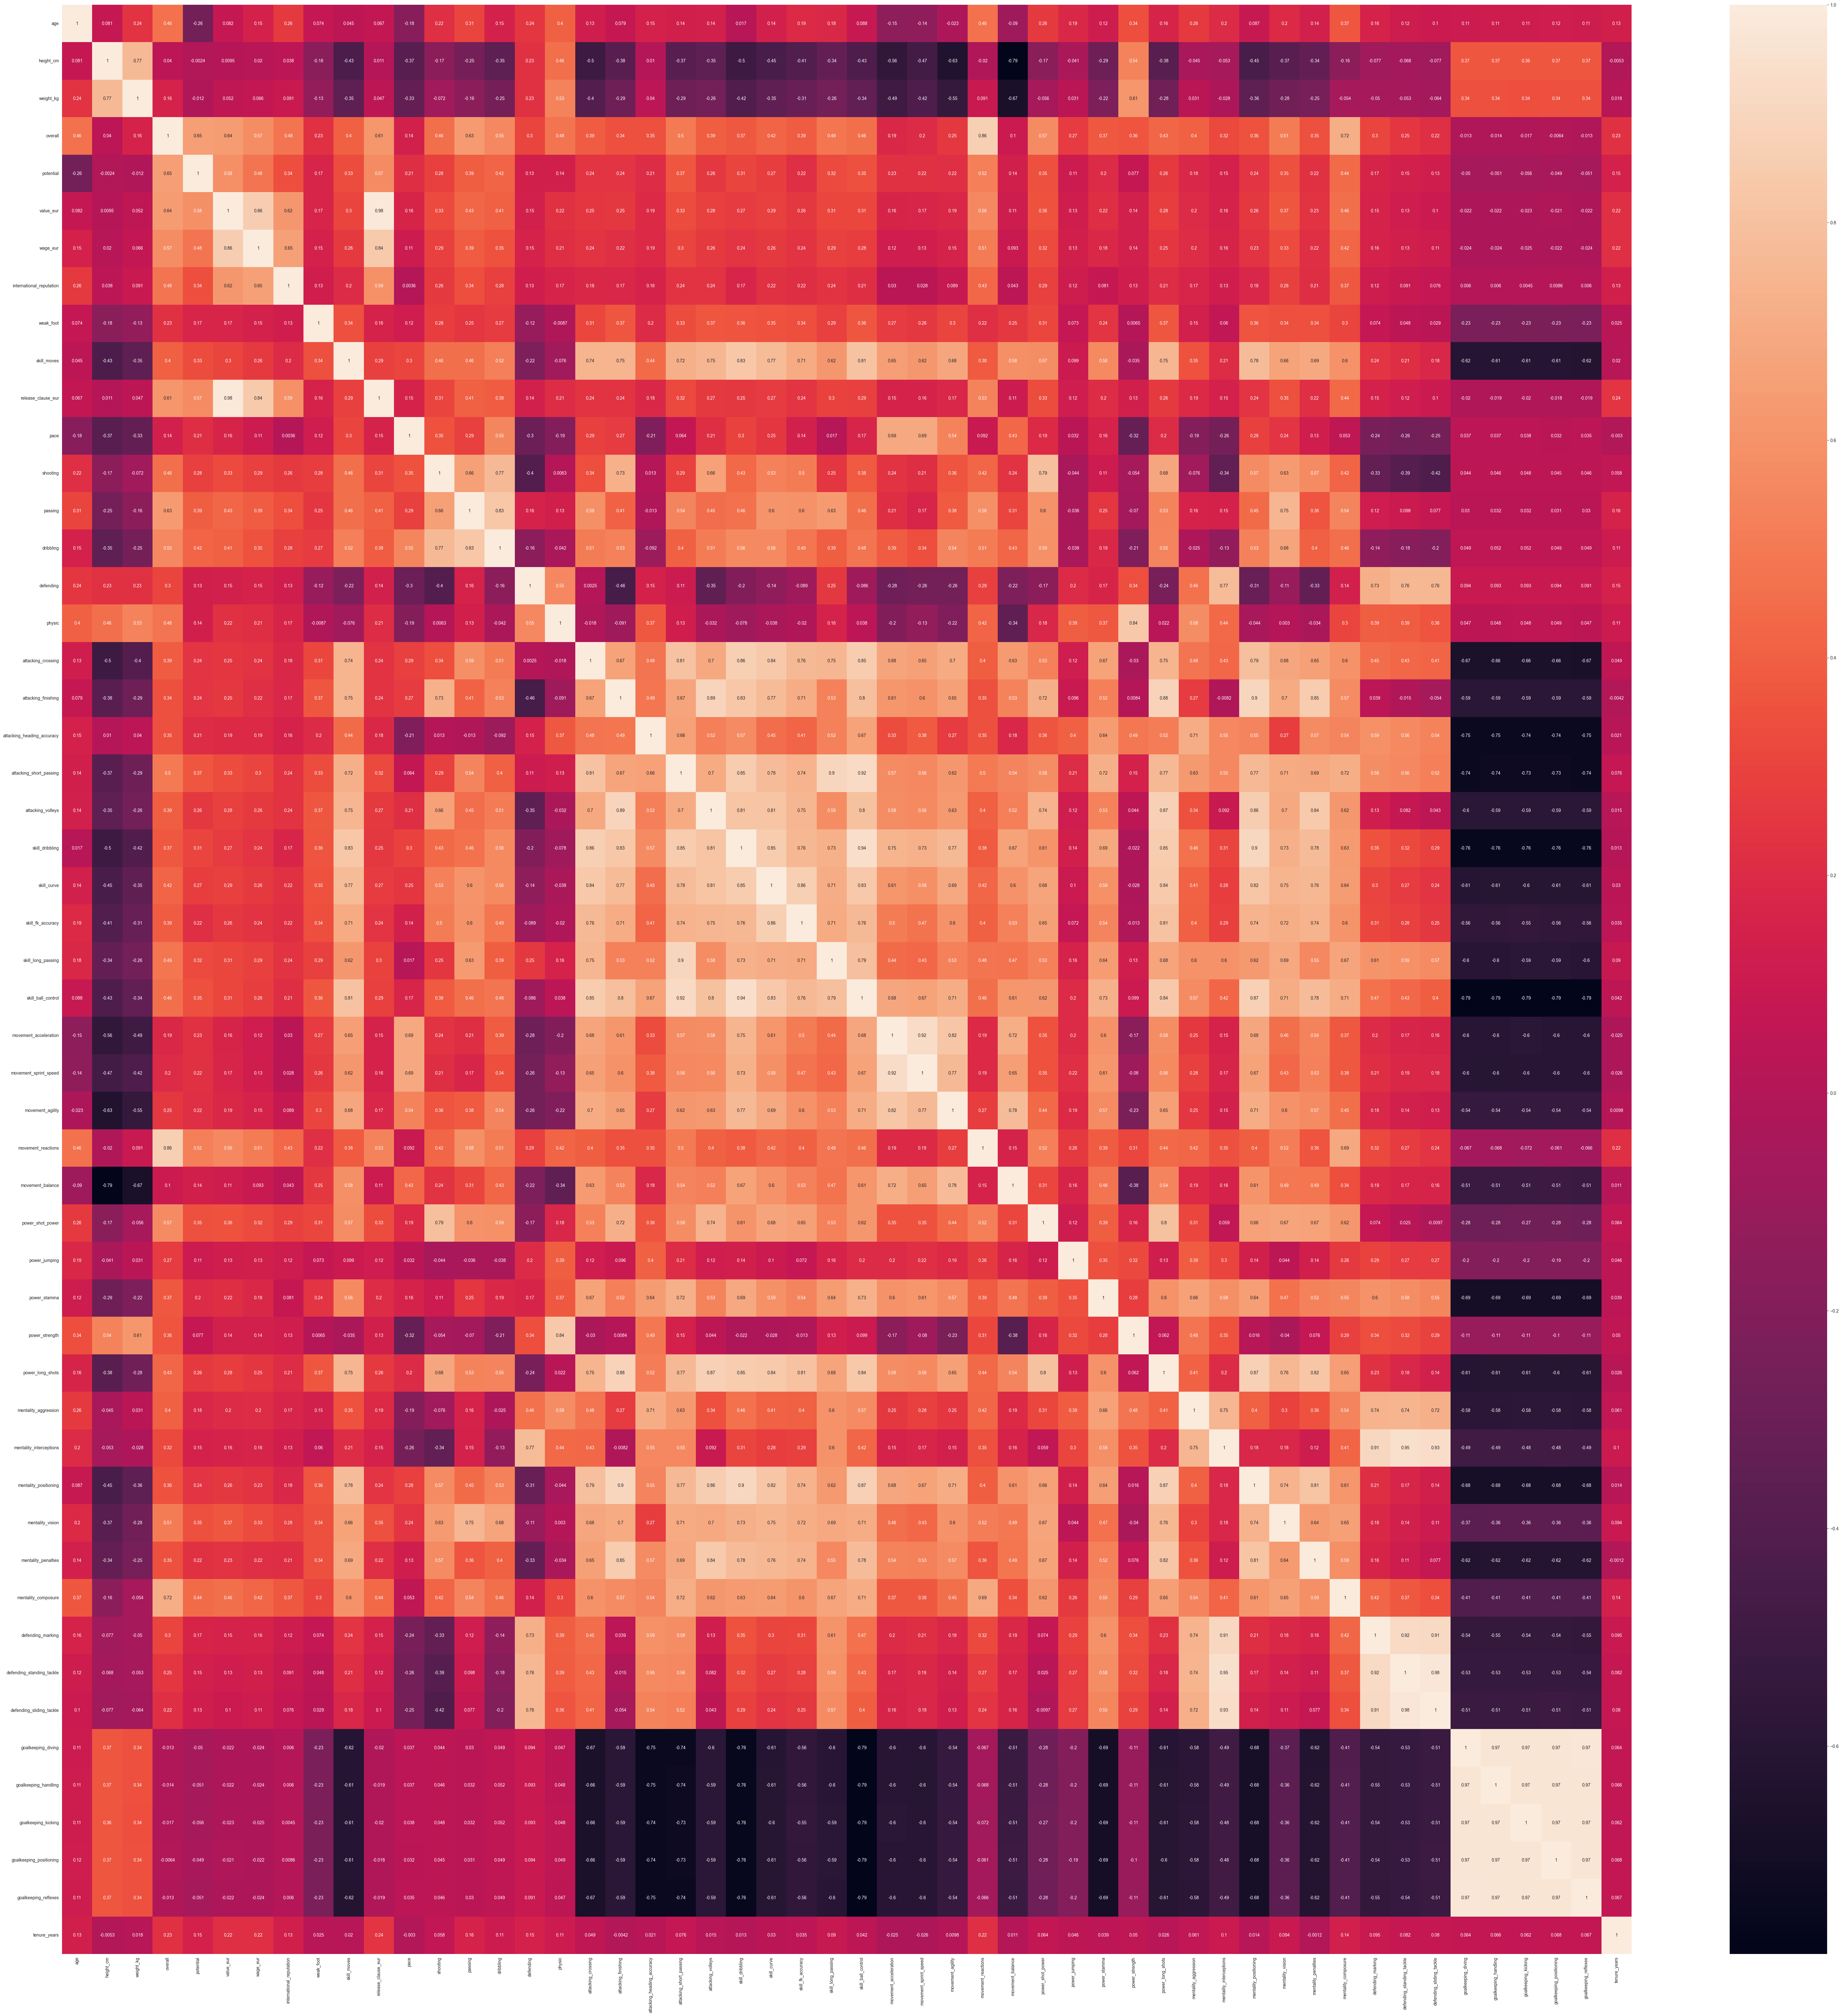

In [61]:
plt.figure(figsize=(80,80))
sns.heatmap(data.select_dtypes(exclude=['object']).corr(),annot=True)

### Insights
Handiling highly correlated columns by performing feature extraction PCA technique

## Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
L=LabelEncoder()

In [64]:
encoding_columns =data.select_dtypes(include='object').columns.to_list()

In [65]:
for i in encoding_columns:
    data[i]=L.fit_transform(data[i])

## Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
numeric_col= data.select_dtypes(include=['float64','int64']).columns

scaler = MinMaxScaler()
data[numeric_col]=scaler.fit_transform(data[numeric_col])


In [68]:
data.head()

age  height_cm  weight_kg   overall  potential  value_eur  wage_eur   
0  0.615385   0.285714   0.366667  1.000000   0.978261   0.905213  1.000000  \
1  0.692308   0.632653   0.550000  0.978261   0.956522   0.554502  0.716814   
2  0.423077   0.387755   0.300000  0.956522   0.934783   1.000000  0.513274   
3  0.384615   0.653061   0.616667  0.934783   0.956522   0.734597  0.221239   
4  0.461538   0.387755   0.400000  0.934783   0.913043   0.853081  0.831858   

   player_positions  preferred_foot  international_reputation  weak_foot   
0                12               0                      1.00       0.75  \
1                14               1                      1.00       0.75   
2                 8               1                      1.00       1.00   
3                 5               1                      0.50       0.50   
4                 8               1                      0.75       0.75   

   skill_moves  work_rate  body_type  real_face  release_clause_eur   
0         0.75          7          4          1            1.000000  \
1         1.00          1          1          1            0.492816   
2         1.00          2          5          1            0.996935   
3         0.00          8          6          1            0.841154   
4         0.75          2          6          1            0.942284   

   team_position      pace  shooting   passing  dribbling  defending   
0             25  0.875000  0.987179  1.000000   1.000000   0.320000  \
1             14  0.916667  1.000000  0.852941   0.904110   0.266667   
2              0  0.930556  0.897436  0.926471   0.986301   0.226667   
3              5  0.625000  0.500000  0.500000   0.561644   0.546667   
4             14  0.930556  0.871795  0.911765   0.972603   0.266667   

     physic  attacking_crossing  attacking_finishing   
0  0.619048            0.943182             1.000000  \
1  0.809524            0.897727             0.989247   
2  0.492063            0.931818             0.913978   
3  0.619048            0.090909             0.096774   
4  0.619048            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys   
0                    0.738636                 1.000000           0.977011  \
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing   
0         1.000000     0.988636           1.000000            1.000000  \
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed   
0            1.000000               0.929412               0.858824  \
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power   
0          0.964706            0.986667          0.976471          0.888889  \
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots   


## Feature Extraction

### PCA

#### Ploting the graph of PCs ,to analyse properly

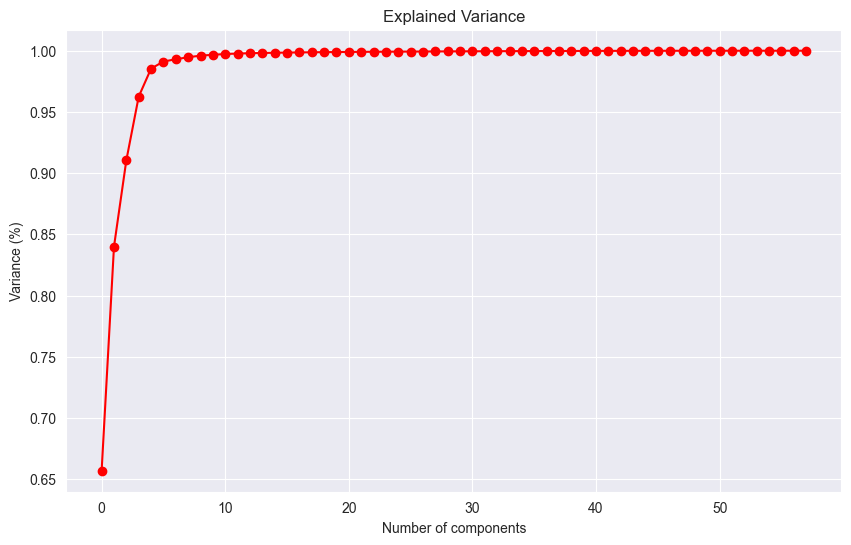

In [69]:
pca=PCA()
principalComponents = pca.fit_transform(data)
cumsum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(cumsum_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

### Insights
1. 2 components explaning more than 90% of the variance in the data

In [70]:
pca=PCA(n_components=2)
principle_components=pca.fit_transform(data)

In [71]:
transformed_data=pd.DataFrame(principle_components,columns=['PC1','PC2'])

In [72]:
transformed_data.head()

PC1       PC2
0  -4.967523  4.471629
1   5.214549  9.871280
2  20.108034  6.378255
3  15.845984  1.138229
4   6.345720  3.924676

In [73]:
transformed_data = transformed_data.values

## Model Implementation

### KMeans Clustering
Elbow Method to determine number of cluster to choose

In [74]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(transformed_data)
    wcss.append(model.inertia_)

Text(0, 0.5, 'Number of Clusters')

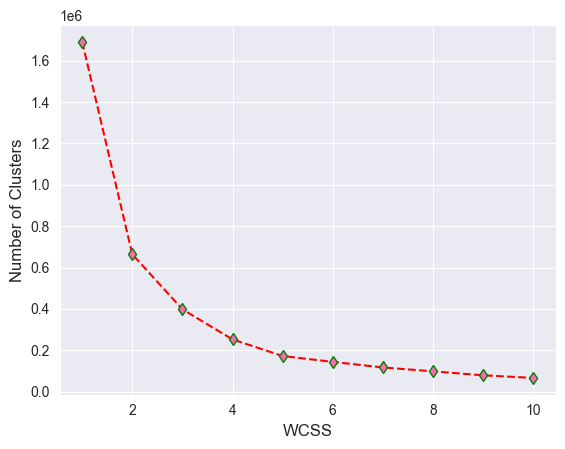

In [75]:
plt.plot(list(range(1,11)),wcss,'r--d',mec='g',mfc='hotpink')
plt.xlabel('WCSS',fontsize=12)
plt.ylabel('Number of Clusters',fontsize=12)

### Insights
1. Since the graph is bending at 2 clusters, we will choose number of clusters 
   as 3. 
2. Since the error is less as cimpared to 2 clusters.

In [76]:
model1=KMeans(n_clusters=3,random_state=42)
predicted_data = model1.fit_transform(transformed_data)
labels_Kmeans= model.fit_predict(transformed_data)

In [77]:
predicted_data

array([[ 0.54676638, 18.93485926,  8.36797083],
       [11.46378681, 12.30574521, 16.11708038],
       [25.30214541,  8.49504628, 25.59897245],
       ...,
       [ 8.17438588, 20.81931407,  3.49915809],
       [ 8.05609291, 20.75056861,  3.47629004],
       [ 8.71144612, 20.89004394,  3.38476946]])

In [78]:
model1.labels_

array([0, 0, 1, ..., 2, 2, 2])

In [79]:
model1.cluster_centers_

array([[-5.15572223,  4.98498515],
       [13.62519757,  0.88838733],
       [-3.40264126, -3.74871663]])

## Model Evaluation

In [80]:
score=davies_bouldin_score(transformed_data, labels_Kmeans)


In [81]:
print(score)

0.643416947784681


In [82]:
silhouette_score(transformed_data , labels_Kmeans)


0.5706458583732896

## Hierarchical Clustering

In [83]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
predicted_data_hierarchical =agg_clustering.fit(transformed_data)
labels_agg = agg_clustering.fit_predict(transformed_data)

In [84]:
labels_agg

array([0, 2, 1, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [85]:
davies_bouldin_score(transformed_data,labels_agg)


0.922640147758238

In [86]:
silhouette_score(transformed_data,labels_agg)

0.4451900717174636

## Gaussian Mixture

In [87]:
from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(n_components = 3,random_state=42)
labels_guassian = gmm.fit_predict(transformed_data)

In [88]:
labels_guassian

array([0, 1, 1, ..., 2, 2, 2], dtype=int64)

### Model Evaluation

In [89]:
davies_bouldin_score(transformed_data,labels_guassian)

0.7913309495563583

In [90]:
silhouette_score(transformed_data,labels_guassian)

0.5010465350101441

### Model Comparision 

In [95]:
#pip install plotly

In [108]:
import plotly.graph_objects  as go
import pandas as pd


models = ['KMeans ','Hierarchical Clustering ','Gaussian Mixture']
silhouette_scores = [0.49,0.44,0.50]
davies_bouldin_scores = [0.79,0.92,0.79]

data=pd.DataFrame({
    'Model':models,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Score':davies_bouldin_scores 
})

fig_silhouette = go.Figure()
fig_silhouette.add_trace(go.Bar(
    x=data['Model'],
    y=data['Silhouette Score'],
    marker_color=['#3498db', '#e74c3c', '#2ecc71'],
    text=data['Silhouette Score'],
    textposition = 'auto'))
                  
fig_silhouette.update_layout(
    title='Silhouette Scores of Clustering Models',
 xaxis_title='Model',
 yaxis_title='Silhouette Score',
 template='plotly_white'
)
fig_davies_bouldin = go.Figure()
fig_davies_bouldin.add_trace(go.Bar(
 x=data['Model'],
 y=data['Davies-Bouldin Score'],
 marker_color=['#3498db', '#e74c3c', '#2ecc71'],
 text=data['Davies-Bouldin Score'],
 textposition='auto'
))
fig_davies_bouldin.update_layout(
 title='Davies-Bouldin Scores of Clustering Models',
 xaxis_title='Model',
 yaxis_title='Davies-Bouldin Score',
 template='plotly_white'
)
# Display the plots
fig_silhouette.show()
fig_davies_bouldin.show()

In [114]:
clustering_algorithms = {
 'KMeans': KMeans(n_clusters=3, random_state=42),
 'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
 'GaussianMixture': GaussianMixture(n_components=3, random_state=42)
}
metric1 =[]
metric2 =[]
for name, algorithm in clustering_algorithms.items():
    if name == 'GaussianMixture':
         labels = algorithm.fit_predict(transformed_data)
    else:
         labels = algorithm.fit_predict(transformed_data)

    silhouette_avg = silhouette_score(transformed_data, labels)
    davies_bouldin_avg = davies_bouldin_score(transformed_data, labels)

    metric1.append(silhouette_avg)
    metric2.append(davies_bouldin_avg)


In [115]:
print('Model Name :','KMeans')
print('Silhouette Score:', metric1[0])
print('Davies Bouldin score:', metric2[0])
print('='*75)
print('Model Name :','Hierarchical Clustering')
print('Silhouette Score:', metric1[1])
print('Davies Bouldin score:', metric2[1])
print('='*75)
print('Model Name :','GaussianMixture')
print('Silhouette Score:', metric1[2])
print('Davies Bouldin score:', metric2[2])


Model Name : KMeans
Silhouette Score: 0.4999340437430177
Davies Bouldin score: 0.7992242332133613
Model Name : Hierarchical Clustering
Silhouette Score: 0.4451900717174636
Davies Bouldin score: 0.922640147758238
Model Name : GaussianMixture
Silhouette Score: 0.5010465350101441
Davies Bouldin score: 0.7913309495563583


## Conclusion


This report presents a comparative analysis of three clustering models: K-Means, Hierarchical Clustering, and Gaussian Mixture. Each model was evaluated using two metrics: the Silhouette Score and the Davies-Bouldin Index (DBI).

K-Means Clustering

Silhouette Score: 0.49
Davies-Bouldin Index (DBI): 0.79
Analysis: The Silhouette Score indicates that the clusters formed by K-Means are moderately well-defined, with reasonable separation between clusters. The DBI suggests good clustering performance, with compact and distinct clusters. Overall, K-Means performs well in terms of both metrics, making it a reliable choice for clustering in this context.

Hierarchical Clustering

Silhouette Score: 0.44
Davies-Bouldin Index (DBI): 0.92
Analysis: The Silhouette Score is slightly lower than that of K-Means, indicating less well-defined clusters with more overlap between clusters. The DBI suggests poorer clustering performance, with less compact and more dispersed clusters. Overall, Hierarchical Clustering shows weaker performance compared to K-Means, making it a less desirable option for clustering in this scenario.

Gaussian Mixture

Silhouette Score: 0.50
Davies-Bouldin Index (DBI): 0.79
Analysis: The Silhouette Score is the highest among the three models, indicating well-defined clusters with clear separation. The DBI suggests excellent clustering performance, with compact and distinct clusters. Overall, Gaussian Mixture performs the best in terms of both metrics, making it the most effective clustering method for this dataset.

Conclusion

Based on the analysis, Gaussian Mixture is the top-performing clustering model, followed closely by K-Means. Hierarchical Clustering shows weaker performance compared to the other two models. The choice of clustering model depends on the specific requirements of the project, but Gaussian Mixture is a strong contender for clustering in this context.

Final Conclusion

In conclusion, based on the comparative analysis of the three clustering models, Gaussian Mixture is recommended as the most effective clustering model for the given dataset, followed closely by K-Means. Hierarchical Clustering, while a viable option, may not be the best choice due to its relatively poorer performance in defining distinct clusters.

Challenges Faced

During the clustering analysis, several challenges were encountered, including:

General Challenges

Handling Missing Values: The dataset contained missing values that needed to be handled appropriately to prevent distortion of the clustering results.

Feature Selection: Selecting relevant features while avoiding redundancy was crucial to prevent negatively impacting the clustering performance.

Normalization: Ensuring all features were on a comparable scale was necessary to prevent features with larger ranges from dominating the clustering process.

Curse of Dimensionality: High-dimensional data can lead to issues such as the distance metrics becoming less meaningful, which can affect the clustering results. Dimensionality reduction techniques like PCA were considered, but balancing dimensionality reduction with the retention of meaningful information was challenging.

Model-Specific Challenges
K-Means Clustering:
Initialization Sensitivity: The final clusters can be sensitive to the initial choice of centroids, leading to different results in different runs.
Cluster Shape Assumptions: K-Means assumes spherical clusters of similar size, which may not always be the case in real-world data.

Agglomerative Hierarchical Clustering:
Scalability: This method is computationally intensive and scales poorly with large datasets, making it challenging to apply to a dataset as large as FIFA20 without substantial computational resources.
Number of Clusters: Determining the number of clusters from the dendrogram can be subjective.

Gaussian Mixture Models (GMM):

Complexity: GMM is computationally more complex and can suffer from convergence issues, particularly with large datasets.
Cluster Shape Assumptions: GMM assumes clusters follow a Gaussian distribution, which may not hold true for all clusters in the dataset.